# Mod 3: Project 2

### UFO Sightings

#### Import the following libraries

In [133]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
# !pip install cufflinks
import cufflinks as cf
cf.go_offline()
from plotly.offline import iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#### Connect to the database called ufos.db which has two tables called populations and ufos. 

In [134]:
conn = sqlite3.connect('ufos.db')

In [135]:
c = conn.cursor()

#### Grab all the data from the database populations and save it as a dataframe table. 

In [136]:
c.execute('''select * from populations''')
population_df = pd.DataFrame(c.fetchall())
population_df.columns = [i[0] for i in c.description]

In [137]:
population_df.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
1,AK,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
2,AZ,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
3,AR,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
4,CA,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"


#### Removed all the commas from the population values. 

In [139]:
column_names = population_df.columns

for column_name in column_names:
    population_df[column_name]=population_df[column_name].apply(lambda x: x.replace(',',''))
population_df.head()


,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


#### Changed the population values from objects to integers. 

In [7]:
for column_name in column_names[1:]:
    population_df[column_name] = population_df[column_name].astype(int)
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
Geographic Area    51 non-null object
2010               51 non-null int64
2011               51 non-null int64
2012               51 non-null int64
2013               51 non-null int64
2014               51 non-null int64
2015               51 non-null int64
2016               51 non-null int64
2017               51 non-null int64
2018               51 non-null int64
dtypes: int64(9), object(1)
memory usage: 4.1+ KB


#### Grabbing the data from the ufos table and making it a dataframe. 

In [8]:
c.execute('''select * from ufos''')
ufo_df = pd.DataFrame(c.fetchall())
ufo_df.columns = [i[0] for i in c.description]
ufo_df.head()

,Date_Time,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,5/9/19 21:15,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,5/8/19 23:00,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,5/8/19 23:00,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,5/8/19 01:30,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,5/8/19 01:00,Highlands,NC,Light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


In [131]:
ufo_df.head()

,Date_Time,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,5/9/19 21:15,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,5/8/19 23:00,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,5/8/19 23:00,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,5/8/19 01:30,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,5/8/19 01:00,Highlands,NC,Light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


#### The total number of sightings.

In [146]:
len(ufo_df)

87749

#### Converted Duration_sec values into floats.

In [141]:
ufo_df.Duration_sec=ufo_df.Duration_sec.astype(float)

#### Initial data exploration before normalization. 

In [23]:
c.execute('''select * from ufos where state = 'NM' ''')
ufo_df_nm = pd.DataFrame(c.fetchall())
ufo_df_nm.columns = [i[0] for i in c.description]

In [26]:
c.execute('''select * from ufos where state= 'NV' ''')
ufo_df_nv = pd.DataFrame(c.fetchall())
ufo_df_nv.columns = [i[0] for i in c.description]

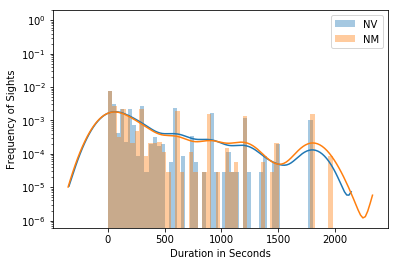

In [27]:
ufo_df_nv.Duration_sec=ufo_df_nv.Duration_sec.astype(float)
ufo_df_nm.Duration_sec=ufo_df_nm.Duration_sec.astype(float)
fig = plt.figure(figsize=(6,4))
sns.distplot(ufo_df_nv[ufo_df_nv.Duration_sec<2000]['Duration_sec'], bins=50, label='NV')
sns.distplot(ufo_df_nm[ufo_df_nm.Duration_sec<2000]['Duration_sec'], bins=50, label='NM')
plt.semilogy(True)
plt.ylabel('Frequency of Sights')
plt.xlabel('Duration in Seconds')
plt.legend()

In [145]:
# ufo_df.Shape.value_counts()

#### Doing a bootstrap sampling on the duration for Nevada and New Mexico. 

In [31]:
nv_means = []
for i in range(1000):
    x_nv = np.random.choice(ufo_df_nv['Duration_sec'],size=500)
    nv_means.append(x_nv.mean())

In [32]:
nm_means = []
for i in range(1000):
    x_nm = np.random.choice(ufo_df_nm['Duration_sec'],size=500)
    nm_means.append(x_nm.mean())

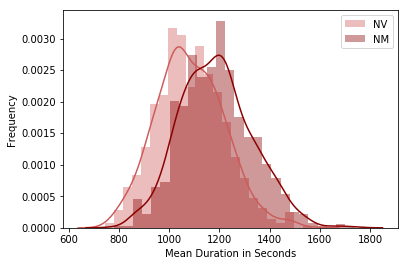

In [198]:
fig = plt.figure(figsize=(6,4))
sns.distplot(nv_means, label='NV', color='indianred')
sns.distplot(nm_means, label='NM', color='darkred')
plt.ylabel('Frequency')
plt.xlabel('Mean Duration in Seconds')
plt.legend()
plt.savefig('state.png')

In [34]:
ttest_ind(nv_means,
          nm_means ,
          equal_var=False)

Ttest_indResult(statistic=-16.240722291796846, pvalue=8.552190900044809e-56)

## If you want to see a sighting for longer, go to New Mexico. 
---

#### What shape would you expect to see more often?

In [36]:
ufo_df.Shape.value_counts().head(3)

Light       18609
Circle       9353
Triangle     8687
Name: Shape, dtype: int64

#### Looping through and filtering all the shapes' durations.

In [151]:
circle_means = []
for i in range(1000):
    x_circle = np.random.choice(ufo_df[ufo_df.Shape=='Circle']['Duration_sec'],size=500)
    circle_means.append(x_circle.mean())

In [40]:
triangle_means = []
for i in range(1000):
    x_triangle = np.random.choice(ufo_df[ufo_df.Shape=='Triangle']['Duration_sec'],size=500)
    triangle_means.append(x_triangle.mean())
    

In [41]:
light_means = []
for i in range(1000):
    x_light = np.random.choice(ufo_df[ufo_df.Shape=='Light']['Duration_sec'],size=500)
    light_means.append(x_light.mean())
    

#### Looking at the scaled histogram of the bootstrapped resampled distribution of the duration of shapes.

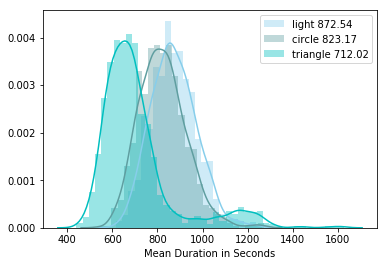

In [197]:
fig = plt.figure(figsize=(6,4))
clabel = 'circle {0:1.2f}'.format(np.array(circle_means).mean())
tlabel = 'triangle {0:1.2f}'.format(np.array(triangle_means).mean())
llabel = 'light {0:1.2f}'.format(np.array(light_means).mean())
sns.distplot(light_means, label=llabel, color='skyblue')
sns.distplot(circle_means, label=clabel, color='cadetblue')
sns.distplot(triangle_means, label=tlabel, color='c')
plt.xlabel('Mean Duration in Seconds')
plt.legend()
plt.savefig('shape.png')

#### Three t-tests of the top most common shapes with their pairs. 

In [52]:
ttest_ind(circle_means,
          triangle_means,
          equal_var=False)

Ttest_indResult(statistic=17.463466197074766, pvalue=1.7443471068657133e-62)

In [53]:
ttest_ind(circle_means,
          light_means,
          equal_var=False)

Ttest_indResult(statistic=-11.622695071345559, pvalue=2.9275127445664277e-30)

In [54]:
ttest_ind(triangle_means,
          light_means,
          equal_var=False)

Ttest_indResult(statistic=-25.24308285446043, pvalue=1.0082336489739122e-118)

## The null hypothesis was that people see them the same amount of time. If you see a light in the sky it will last 1 minute longer than a circle. Circle lasts 2 minutes longer than triangle. A light lasts almost 3 minutes longer than a triangle. 
---

#### Grouped number of sights by year and by states.

In [56]:
year_list = range(2010, 2019)
cmd = """SELECT state """
for year in year_list:
    cmd += """, \n sum(CAST ("y{0}" AS int)) as N{0}""".format(year)
cmd += """\n FROM \n \t(SELECT state """
for year in year_list:
    cmd += """, \n \t COUNT( CASE WHEN strftime('%Y', event_date) = '{0}' THEN shape END) AS 'y{0}'""".format(year)
cmd += """, \n \t strftime('%Y', event_date) as year FROM ufos """
cmd += """\n \t GROUP BY strftime('%Y',event_date), state)"""
cmd += """\n GROUP BY state"""
# print(cmd)

In [57]:
c.execute(cmd)
ufo_df_groupstate = pd.DataFrame(c.fetchall())
ufo_df_groupstate.columns = [i[0] for i in c.description]
ufo_df_groupstate.head() #[(ufo_df_groupstate.state=='AB')]

,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,AB,19,11,17,20,38,33,25,38,13
1,AK,11,14,40,47,39,32,36,20,20
2,AL,20,29,50,70,111,58,44,55,24
3,AR,37,35,46,50,25,37,31,36,32
4,AZ,94,127,168,211,265,247,213,190,74


#### Merged the population and ufos dataframes on state. 

In [58]:
ufo_pop_df  = pd.merge(population_df, ufo_df_groupstate,
                  left_on='Geographic Area',
                  right_on='state', 
                  how='left')

#### Deleted Geographic areas since the entries were identical to our state column. 

In [60]:
ufo_pop_df.drop(['Geographic Area'], axis=1, inplace=True)
ufo_pop_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,AL,20,29,50,70,111,58,44,55,24
1,713906,722038,730399,737045,736307,737547,741504,739786,737438,AK,11,14,40,47,39,32,36,20,20
2,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,AZ,94,127,168,211,265,247,213,190,74
3,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,AR,37,35,46,50,25,37,31,36,32
4,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,CA,481,498,640,653,780,725,516,516,270


#### Creating new columns with the number of sites per million people. 

In [61]:
for year in year_list:
    new_col = 'NperMil{0}'.format(year)
    ufo_col = 'N{0}'.format(year)
    pop_col = '{0}'.format(year)
    
    ufo_pop_df[new_col] = ufo_pop_df[ufo_col]/(ufo_pop_df[pop_col]/1e6)

In [63]:
ufo_pop_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,state,...,N2018,NperMil2010,NperMil2011,NperMil2012,NperMil2013,NperMil2014,NperMil2015,NperMil2016,NperMil2017,NperMil2018
0,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,AL,...,24,4.179337,6.043135,10.383000,14.491373,22.922134,11.950976,9.044667,11.281774,4.910113
1,713906,722038,730399,737045,736307,737547,741504,739786,737438,AK,...,20,15.408191,19.389561,54.764588,63.768155,52.967037,43.387066,48.549974,27.034845,27.120924
2,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,AZ,...,74,14.669681,19.618454,25.622923,31.801060,39.353474,36.144952,30.667551,26.954652,10.318412
3,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,AR,...,32,12.662655,11.903114,15.582080,16.894466,8.423958,12.422748,10.366471,11.988024,10.617737
4,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,CA,...,270,12.888220,13.229965,16.859505,17.058149,20.194102,18.612106,13.160201,13.096663,6.825586


#### We assume a model which states that there is no change in the number of UFOs across states. Meaning location does not matter for viewing UFOs. For the expected ufo rate per year we add up population and ufo sightings for each state to calculate the national average. 

In [161]:
expected_ufo_rate = []
for year in year_list:
    pop_col='N{}'.format(year)
    total_ufos = ufo_pop_df[pop_col].sum()
    ufo_col='{}'.format(year)
    total_pop = ufo_pop_df[ufo_col].sum()
    expected_ufo_rate.append(total_ufos/(total_pop/1e6))
expected_ufo_rate #expected rates per year


[10.613395245990976,
 13.107387772108318,
 19.663927924146993,
 20.25579333486759,
 22.877860108236213,
 17.75566670544022,
 14.507631568262095,
 12.73577323171193,
 7.720817347609237]

#### Calculating Chi squared for the states in terms of sightings for 2010 -2018.

In [158]:
# observed values sightings for the year 2010 for all the states
best_sightings = pd.DataFrame(ufo_pop_df['state'])
for i, year in enumerate(year_list):
    pop_col='NperMil{}'.format(year)
    new_col='chi2_{}'.format(year)
    best_sightings[new_col]=(ufo_pop_df[pop_col]-expected_ufo_rate[i])**2/expected_ufo_rate[i]
    

In [160]:
# ufo_pop_df

In [165]:
best_sightings = best_sightings.set_index('state').T

In [166]:
# 1. cut the table and transpose chi-squared
# 2. Map probabilities
# 3. Plot table 


In [196]:
best_sightings.iplot()

#### ANOVA

In [119]:
formula = 'Duration_sec ~ C(Shape)'
lm = ols(formula, ufo_df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

               df        sum_sq       mean_sq          F        PR(>F)
C(Shape)     42.0  4.453341e+09  1.060319e+08  10.746247  8.405330e-70
Residual  87706.0  8.653845e+11  9.866880e+06        NaN           NaN


## Not all shapes have the same duration. 
---


#### Tukey: Which one lasts longer? 

In [172]:
mc = MultiComparison(ufo_df['Duration_sec'], ufo_df['Shape'])
result = mc.tukeyhsd()

# print(result)
# print(mc.groupsunique)